# Aula 2 - SVM

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Classificadores de margem
- 3) Support Vector Machines
- 4) Funções de kernel
- 5) SVM na prática com o sklearn
- 6) SVM para regressão 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

## 1) Introdução

Na aula de hoje, falaremos sobre um dos mais interessantes métodos de aprendizagm supervisionada: **SVM** (**S**upport **V**ector **M**achines).

Este método tem uma construção extremamente elegante e robusta, que, apesar de complexa, pode ser entendida em termos geométricos simples. Nesta aula, vamos explorar os principais aspectos desta construção, em uma apresentação mais alto-nível, sem nos preocuparmos demais com os detalhes matemáticos.

Um ponto importantíssimo sobre SVMs, que é o que de fato lhes confere poder tão elevado, é sua **capacidade de produzir uma hipótese simples, a partir de um conjunto de hipóteses complexo**, o que tem consequências diretas na **capacidade de generalização** de modelos SVM: eles são capazes de generalizar muito bem, apesar das hipóteses produzidas parecerem altamente complexas, o que é algo formidável!

Não entraremos nos detalhes matemáticos que justificam e provam os pontos acima. Mas, para quem tiver interesse, quase todo livro-texto de machine learning aborda estas questões. Recomendo, em particular, [este livro](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), que detalha extensivamente SVM e métodos relacionados; ou então [este livro](https://cs.nyu.edu/~mohri/mlbook/), que aborda formalmente a teoria de aprendizagem, eventualmente culminando no enorme sucesso de SVMs. Por fim, aproveito também pra recomendar [este curso](https://work.caltech.edu/index.html) do Caltech, onde os tópicos abordados no livro do Mohri são apresentados de maneira clara, direta, e muito ilustrativa. Esta é minha maior recomendação para quem tem interesse em iniciar os estudos em teoria de aprendizagem estatística, e então ter todo o fundamento rigoroso pra entender porque SVMs são tão interessantes!

Agora, vamos iniciar nossa exposição, introduzindo um conceito fundamental para SVMs: a **margem**, e os chamados **classificadores de margem**.

____
____
____

## 2) Classificadores de margem

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes. Alguns exemplos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Podemos nos perguntar: por que isso acontece?

Intuitivamente, é possível dizer que a fronteira de decisão do primeiro modelo está "**muito próxima**" dos pontos da classe vermelha, não é? 

Mas, se estamos avaliando a **fronteira de decisão**, é razoável que nos importemos, na realidade, com a proximidade entre ela **e os "pontos mais externos"** da respectiva classe, não é mesmo? Afinal, intuitivamente, estes são os pontos que exercem maior influência sobre a fornteira de decisão, justo?

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Dada a definição de margem, fica claro que o terceiro modelo seria nossa melhor opção, pois ele **apresenta maior margem**. De fato, intuitivamente, um classificador que apresenta maior margem, terá melhores chances de generalização!

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;
</ul>
</span>
<br>
</div>

### Classificador de margem suave

Um classificador de margem suave é obtido com uma modificação extremamente simples com relação ao classificador de margem máxima: a permissão de que **erros de classificação** sejam cometidos na base de treino! Uma possível solução seria algo assim:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas!

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor - caminhamos na direção do **sweet spot** de generalização!!

Note, portanto, que a introdução de uma margem suave pode ser visto como **um procedimento de regularização** aplicado ao classificador de margem! E é exatamente assim que veremos este procedimento quando chegarmos em SVM - um procedimento de regularização!

Um classificador de margem suave é também chamado de **classificador de vetores de suporte (*support vector classifier*)**, sendo que os pontos que "apoiam" a margem são justamente os chamados **vetores de suporte (*support vectors*)**.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;
</ul>
</span>
<br>
</div>

Estamos chegando perto das SVMs!

Mas, antes de chegarmos lá, é importante frisarmos um ponto fundamental:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

Vamos entender melhor o comentário acima com alguns exemplos:

### $D=2$

Se temos uma duas features$(X_1, X_2)$, teremos um **hiperplano $1-$dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features$(X_1, X_2, X_3)$, teremos um **hiperplano $2-$dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

Para dimensões maiores, $D > 3$, não conseguimos mais visualizar a fronteira de decisão, mas, se qualquer forma, ela será linear (por isso, um hiper**plano**!).

Agora estamos prontos para introduzir as tão aguardadas **Support Vector Machines!**

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;
</ul>
</span>
<br>
</div>

<!-- 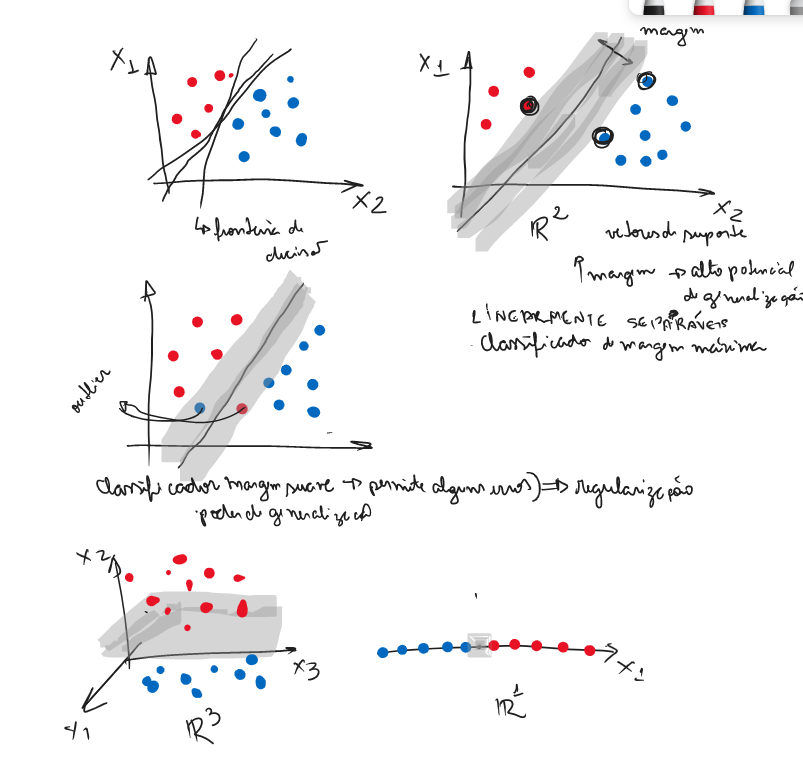 -->

____
____
____

## 3) Support Vector Machines

Imagine que temos o seguinte dataset (com uma única dimensão):

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/e00c77e0-14fb-472f-b9ae-f6af7b229ad5.PNG width=400>

É evidente que este dataset **não é linearmente separável**! Portanto, não conseguimos produzir um classificador de vetores de suporte para este dataset **no espaço de features original**.

Mas, aí entra uma ideia muito interessante: e se nós **levarmos os dados para um ou outro espaço?**

Seria possível que no espaço original os dados não sejam linearmente separáveis, mas **o sejam** em algum outro espaço?

Bom, a priori, vamos tentar algo bem simples... Que tal introduzirmos **uma nova feature** $X_2 = X_1^2$? O que aconteceria neste caso?

De fato, ao **introduzirmos** uma nova feature, estamos fazendo com que **cada observação passe a ser caracterizada por duas features ao invés de uma única**!

Ou seja, nosso espaço de features efetivamente muda de $\mathbb{R}^1$ para $\mathbb{R}^2$! Veja:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8d5e6199-8a33-45cf-9e4f-c6507024fb36.PNG width=800>

O procedimento que fizemos é chamado de **feature map**, e ele é matematicamente representado pelo mapa (função) $\Phi$. 

> Como $\Phi$ leva observações do espaço original ($1$D, uma única feature $X_1$, para vetores do novo espaço ($2$D, duas features, $X_1$ e $X_2$), o denotamos como: 
$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = (X_1, X_2)
\end{align*}$$

Note que no caso ilustrado acima, temos $X_2 = X_1^2$, isto é, $\Phi(\vec{x}) = (X_1, X_1^2)$.

Então, apesar do nome assustador, o feature map é algo que já estávamos acostumados a fazer, quando usamos o [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), lembra? :)

Um pouco mais de terminologia:

> O "espaço original" é comumente chamado de **espaço de input** (representaremos por $\mathcal{X}$); enquanto o espaço após a aplicação do feature map é chamado de **espaço de features (representaremos por $\mathcal{Z}$)**

<img src=https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png width=400>

Também é comum se referir ao espaço de features como **espaço z**, devido à comum notação $\Phi(\vec{x}) \equiv \vec{z}$. Neste caso, teríamos:

$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = \vec{z} = (Z_1, Z_2)
\end{align*}$$

Uma vez que temos estas definições, podemos perceber a real utilidade do feature map: **os dados não eram linearmente separáveis no espaço de input, mas passaram a ser no espaço de features!**

Isso é realmente formidável, pois, se temos dados linearmente separáveis, podemos **treinar um classificador de margem suave** no espaço de features!

Isso pode parecer estranho, pois, afinal, gostaríamos de separar os dados no espaço original, não é mesmo?

Na verdade, nosso objetivo é que os dados sejam separados, **não importa em que espaço**! Se conseguirmos encontrar um espaço onde há separabilidade através da aplicação de um feature map, bastaria **aplicar o mesmo feature map** aos dados de treino e de teste, e a separabilidade sempre estará garantida!

Muito legal, não é mesmo?

Vamos gerar alguns dados pra ver isto funcionando na prática:

In [2]:
np.random.seed(42)

data = {'X_1': np.random.normal(0, 1, 20)}

df = pd.DataFrame(data)

df['y'] = df['X_1'].apply(lambda x: 1 if abs(x) > 1.1 else 0)

df

,X_1,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,1
4,-0.234153,0
5,-0.234137,0
6,1.579213,1
7,0.767435,0
8,-0.469474,0
9,0.542560,0


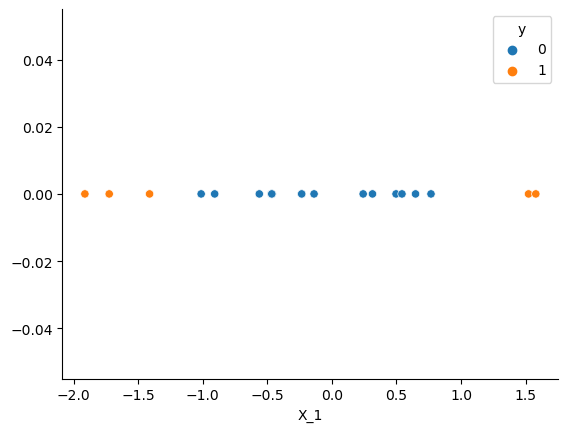

In [3]:
sns.scatterplot(data=df, x='X_1', y=np.zeros(df.shape[0]), hue='y')

sns.despine() # tirar a borda superior e esquerda

plt.show()

In [4]:
df['X_2'] = df['X_1']**2

In [5]:
df

,X_1,y,X_2
0,0.496714,0,0.246725
1,-0.138264,0,0.019117
2,0.647689,0,0.419500
3,1.523030,1,2.319620
4,-0.234153,0,0.054828
5,-0.234137,0,0.054820
6,1.579213,1,2.493913
7,0.767435,0,0.588956
8,-0.469474,0,0.220406
9,0.542560,0,0.294371


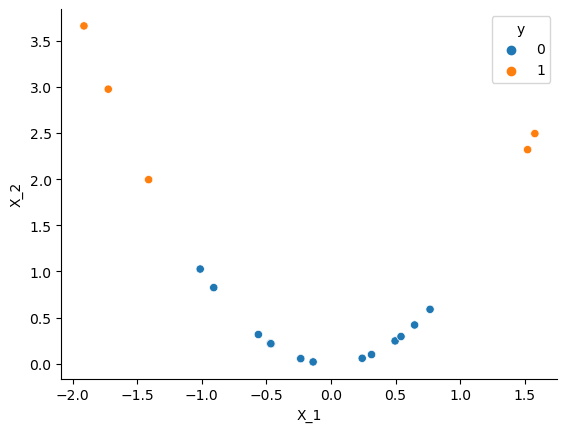

In [6]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y')

sns. despine()

plt.show()

E claro, embora tenhamos visto um feature map do tipo $\Phi : \mathbb{R}^1 \rightarrow \mathbb{R}^2$, eles podem assumir as mais diferentes formas! Em geral, podemos definir um feature map genérico como $\Phi : \mathcal{X} \rightarrow \mathcal{Z}$ (de forma concreta, $\Phi : \mathbb{R}^m \rightarrow \mathbb{R}^n$, para $m, n$ dimensões arbitrárias!)

Mais um exemplo, $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/105e0718-f938-4d09-919a-b37f79b410f7.PNG width=400>

<img src=https://i.pinimg.com/originals/bc/6b/75/bc6b756f5bf44b54f269b2c076cff162.gif width=400>

Finalmente, agora temos todos os elementos necessários para entender o que são as SVMs:

> Uma **Support Vector Machine** nada mais é que **um classificador de margem suave** treinado **no espaço de features**. Portanto, este classificador pressupõe a aplicação prévia de um **feature map** aos dados no espaço de input.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;
</ul>
</span>
<br>
</div>

Da discussão acima, ficou claro que é justamente o feature map que dá grande poder às SVMs. De fato, a possibilidade de conseguirmos separabilidade linear é algo formidável!

Neste contexto, uma pergunta natural é: como escolher um bom feature map? Formalmente, existem infinitos feature maps possíveis! Como escolher, dentre infinitas opções, exatamente o mapa exato que nos garante separabilidade linear no espaço de features? Embora esta pergunta não seja fácil de responder, existem algumas técnicas para nos ajudar a escolher bons feature maps (vamos discutir sobre isso mais a diante).

Além disso, existe um segundo problema, ainda maior: suponha que queiramos introduzir um kernel que leva os pontos para um espaço de features de altíssima dimensionalidade (algo como $\Phi : \mathbb{R}^2 \mapsto \mathbb{R}^{10000}$).

É de se esperar que este seja um feature map **operacionalmente custoso** de ser calculado, não é mesmo? Imagina, ter que aplicar esta transformação para todos os pontos de treino, e depois de teste! De fato, isso rapidamente se torna computacionalmente impraticável...

Pra solucionar este problema, foi introduzido o uso de **funções de kernel** para capturar um aspecto importante dos feature maps! 

Mas, pra entendermos a importância das funções de kernel, é necessário entendermos uma coisa:

> A hipótese do SVM depende apenas do **produto interno** entre as observações no espaço de features!!

A hipótese é a seguinte:

$$f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i \langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle + b\right ) $$

Entendo os termos:

- Cada $\vec{x}_i$, $i = 1, 2, \cdots, N$ é uma das $N$ **observações de treino**; e cada $y_i$ é o respectivo target;
- Cada $\alpha_i$ é um [multiplicador de lagrange](https://en.wikipedia.org/wiki/Lagrange_multiplier). Podemos entendê-los simplesmente como **coeficientes numéricos associados a cada observação de treino**, sendo que $\alpha_i > 0$. Podemos entender estes coeficientes como sendo substitutos ao $\vec{w}$ (uma representação [dual](https://en.wikipedia.org/wiki/Duality_(optimization)) do hiperplano);
- $\langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle$ é o produto interno entre a observação de teste $\vec{x}$ e cada observação de treino $\vec{x}_i$, **no espaço de features**, ou seja, após a aplicação do feature map!

> **Obs.:** na nossa notação de **espaço z**, poderíamos escrever $\Phi(\vec{x}) = \vec{z}$ e $\Phi(\vec{x}_i) = \vec{z}_i$.
<br><br>
No entanto, vamos manter a notação explicita $\Phi(\vec{x})$. Não parece, mas isso na verdade facilitará nossa notação!


Note que, de fato, apenas o produto interno aparece! E é isso que permite o uso das funções de kernel.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;<br><br>
<li>A única coisa que importa pro SVM é o produto interno entre as observações no espaço de features;
</ul>
</span>
<br>
</div>

____
____
____

## 4) Funções de kernel

Uma função de kernel $\kappa$ nada mais é que uma **medida de similaridade** entre dois vetores $\vec{x}$ e $\vec{x}'$ (que no nosso caso, são observações). Definimos como:

$$\boxed{\begin{align*}
\kappa \ \colon \ & \mathcal{X} \times \mathcal{X} \longrightarrow \mathbb{R} \\
& (\vec{x}, \vec{x}') \longmapsto \kappa(\vec{x}, \vec{x}')
\end{align*}}$$

Ou seja, um kernel é uma função que, dadas duas observações $\vec{x}$ e $\vec{x}'$, retorna um número real que caracteriza o quão similar as duas observações são entre si.

**Ponto fundamental**: uma função de kernel permite que **o produto escalar** entre duas observações seja calculado **no espaço de features**, sem que precisemos **explicitamente levar as observações pro espaço de features**.

Ou seja, conseguimos **evitar** que o feautre map, que costuma ser custoso computacionalmente, seja explicitamente aplicado!

E uma vez que pro SVM apenas o produto interno interessa, podemos usar diretamente a função de kernel, que é muito mais computacionalmente simples que o feature map explícito!

Esse é o chamado **kernel trick**.

_____________

#### Exemplo de aplicação do kernel trick

Considere que temos $\mathcal{X} = \mathbb{R}^2$, isto é, $\vec{x} = (X_1, X_2)$, um espaço de input de duas dimensões.

Vamos considerar um feature map $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$, ou seja, teremos $\mathcal{Z} = \mathbb{R}^6$ como espaço de features. Explicitamente, a aplicação do feature map é:

$$\Phi(\vec{x}) = \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right )$$

Assim, tomando duas observações genéricas $\vec{x}$ e  $\vec{x}'$, temos:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= \langle \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right ), \left(1, X'^2_1, X'^2_2, \sqrt{2}X'_1, \sqrt{2}X'_2, \sqrt{2}X'_1 X'_2 \right )\rangle =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + \left ( \sqrt{2}X_1 \right) \left ( \sqrt{2}X'_1 \right) + \left ( \sqrt{2}X_2 \right )\left ( \sqrt{2}X'_2  \right )+ \left (\sqrt{2}X_1 X_2 \right )\left (\sqrt{2}X'_1 X'_2 \right )  =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2 \left ( X_1 X'_1 + X_2 X'_2 + X_1 X'_1 X_2 X'_2 \right ) 
\end{align*}$$

Vamos rearranjar os termos acima da seguinte maneira:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= 1 + \left ( X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2  X_1 X'_1 X_2 X'_2  \right ) + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) =
\\
\\
&= 1 + \left ( X_1 X'_1 + X_2 X'_2\right )^2 + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) = 
\\ 
\\
&= \Big ( 1 + \left ( X_1 X'_1 + X_2 X'_2 \right ) \Big)^2
\end{align*}$$

Agora, note que: $\langle \vec{x} , \vec{x}' \rangle = \langle (X_1, X_2), (X'_1, X'_2) \rangle = X_1 X'_1 + X_2 X'_2$, exatamente como aparece no resultado acima! Sendo assim, temos: 

$$\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2$$

Ou seja, mostramos que é possível escrever o produto interno entre os vetores **no espaço de features** em termos (do produto interno) dos vetores **no espaço de input!**. Oras, isso é justamente o kernel:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2 = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$$

Este é o ponto! Fizemos o exemplo a seguir para ver de fato como a utilização do kernel é correspondente ao produto interno das observações no espaço de features! Isto é, de fato, $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$!

É por isso que dizemos que o kernel nos permite **calcular o produto interno entre dois vetores no espaço de features** sem explicitamente "**ter que visitar**" o espaço de features! Este é o ganho de eficiência que os kernels proporcionam!
_____________

Assim, definimos **o produto interno no espaço de features** como sendo as medidas de similaridade entre os pontos neste espaço:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle \ ,$$

E a hipótese é reescrita como:

$$\boxed{f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i\kappa_\Phi(\vec{x}, \vec{x}_i) + b\right )} $$


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;<br><br>
<li>A única coisa que importa pro SVM é o produto interno entre as observações no espaço de features;<br><br>
<li>Uma função de kernel permite que calculemos o produto interno no espaço de features sem a necessidade de explicitamente aplicar o feature map.
</ul>
</span>
<br>
</div>

Da mesma forma que existem infinitos feature maps possíveis, a variedade de kernels também é imensa! Apesar dos kernels oferecerem uma vantagem operacional absurda com relação à aplicação explícita do feature map, o problema de escolha de um kernel adequado para um determinado problema ainda existe.

Na prática, existem algumas formas de propor kernels, mas este não é um tema fácil. Existe todo um conjunto de métodos e técnicas que se utilizam de kernels para tarefas de aprendizagem, os chamados [métodos de kernel](https://en.wikipedia.org/wiki/Kernel_method).

Apesar da enorme liberdade no design de kernels, há algumas classes particulares de kernels que são comumente utilizados:

- Linear kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \vec{x}, \vec{x}'\rangle $
<br><br>
- Polynomial kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = (\gamma \langle \vec{x}, \vec{x}'\rangle + r)^d$
<br><br>
- Radial Basis Function (RBF) kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \exp(-\gamma \|\vec{x}-\vec{x}'\|^2)$
<br><br>
- Sigmoid kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \tanh(\gamma \langle \vec{x},\vec{x}'\rangle + r)$

> No exemplo explícito que fizemos acima, usamos justamente um kernel polinomial com $r=\gamma=1$ e $d=2$!

Note que a dependência funcional dos kernels muda, dependendo exatamente do feature map específico que eles representam. No entanto, em todos os casos, as features no espaço de input são utilizadas, o que garante a eficiência!

__________

Agora que entendemos o SVM, vamos ver sua aplicação com o sklearn a um problema de classificação!

____
____
____


## 5) Na prática

Para construir um classificador SVM com o sklearn, basta usar a classe [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Vamos utilizar o dataset German Credit Risk, que trata de dados de crédito de um banco alemão, sendo que a variável de interesse (target) será o risco (definição de bom ou mau pagador).

Para a construção de um modelo SVM, é muito importante que os dados sejam normalizados!

O motivo é bem simples: como vimos acima, o SVM é completamente baseado no kernel, que por sua vez é dado por um produto interno. Já o produto interno, é altamente dependente da **escala das features** (lembre-se, $\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left | \Phi(\vec{x}) \right | \left | \Phi(\vec{x}') \right | \cos \left ({\theta_{\vec{x}, \vec{x}'}} \right )$, isto é, a norma dos vetores influencia o produto interno!).

Portanto, para evitar que efeitos de escala influenciem a classificação, a normalização é um passo extremamente importante!

In [7]:
# Importar as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [10]:
df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [12]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Vamos criar uma função para facilitar nossa atuação.
### Pipeline de Pré-processamento
- Para dados numéricos substituir os missigns pela média e padronizar/normalizar dos dados 
- Para os dados categóricos substituir os missings por uma constante (desconhecido) e aplicar o OneHotEncoder (dummies)

In [16]:
# Pipeline para pré-processamento dos dados

def pipe_pre_process_german(df, X, y): 
    # Função para facilitar a gente carregar e transformar os dados de treino e teste de uma única vez 
    
    # Particionar os dados de treino e teste(validação)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    # Transformação das colunas numéricas
    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")), # substituir dados faltantes pela média
                                  ("std", StandardScaler())]) # padronização/normalização

    features_num = X_train.select_dtypes(include=np.number).columns.tolist() # selecionando as colunas numéricas

    # ==========================================================

    # transformação nas colunas categóricas
    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")), # dados faltantes
                                  ("onehot", OneHotEncoder())]) # transformar as categorias em números (LabelEncoder, TargetEncoder)

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist() # selecionando as colunas categóricas

    # ==========================================================

    # aplicando a transformação nos dados de treino tanto nas colunas numéricas quanto nas colunas categóricas
    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

Agora, vamos instanciar a classe do [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)!

Perceba que há muitos hiperparâmetros. Vale a pena estudar um pouco mais o fundo o funcionamento de cada um, e sua influência. Para algumas dicas práticas do uso de SVMs com o sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

Na prática, os principais hiperparâmetros serão `C` e o `gamma` (se o kernel escolhido utilizar este parâmetro, como, por exemplo, o kernel rbf: por isso, o hiperparâmetro `kernel` também é importante!):

- `C`: é um parâmetro de regularização, relacionado com a "suavidade" da margem. Ele controla o tradeoff entre a complexidade da fronteira de decisão, e erros de classificação que são permitidos. Quanto **menor** o C, mais suave será a fronteira de decisão, pois mais erros de classificação são permitidos (isto é, a margem fica **mais larga**); quanto **maior** C, a tolerância a erros de classificação é menor (e a margem fica menos suave, mais complexa);

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

- `gamma`: define a influência que cada ponto tem na fronteira de decisão. É a "abertura" do kernel: quanto **maior** o gamma, a influência é de mais curto alcance, e vice-versa;

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>

- `kernel`: as opções disponíveis são `linear`, `poly`, `rbf` e `sigmoid`, que apresentamos acima. Também é possível utilizar um kernel personalizado pré-calculado (neste caso, usamos a opção `precomputed`).


No que diz respeito a `C` e `gamma`, é importante que valores adequados sejam encontrados com o uso de Grid/Random search, usando **valores exponencialmente espaçados**.

In [13]:
import matplotlib.pyplot as plt

# Carregar o módulo para o SVM
from sklearn.svm import SVC #carregando o módulo de classificação do SVM

In [14]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [17]:
# Definição das features e target
X = df.drop(columns='Risk')
y = df['Risk']

# Uso da função de pipeline para pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_german(df, X, y)

pipe_svc = Pipeline([('pre_process', pre_processador), # Nosso pré-processamento dos dados - criado com a função
                     ('svc', SVC(random_state=42))]) # Instanciando o modelo SVM pra classificação

pipe_svc.fit(X_train, y_train) # Treinando o modelo

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                            

### Pipeline de Avaliação do modelo
- Realiza a predição dos dados de treino com o estimador escolhido
- Obtem matriz de confusão para o modelo de classificação
- Realiza a predição dos dados de teste com o estimador escolhido
- Obtem matriz de confusão para o modelo de classificação

In [18]:
# Função para avaliar o modelo

def metricas_classificacao(estimator):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train) # predição dos dados de TREINO

    print(confusion_matrix(y_train, y_pred_train)) # fazer a matriz de confusão PARA MODELOS DE CLASSIFICAÇÃO

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train) # desenhar a matriz de confusão colorida
    plt.show()

    print(classification_report(y_train, y_pred_train)) # relatório de classificação


    # ============================================

    print("\nMétricas de avaliação de teste:") 

    y_pred_test = estimator.predict(X_test) # predição dos dados de TESTE

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))


Métricas de avaliação de treino:
[[102 138]
 [ 18 542]]


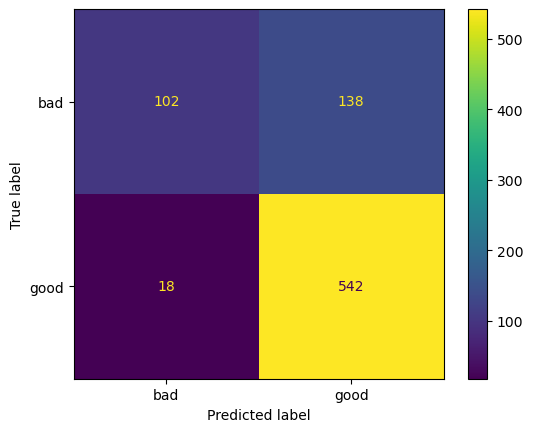

              precision    recall  f1-score   support

         bad       0.85      0.42      0.57       240
        good       0.80      0.97      0.87       560

    accuracy                           0.81       800
   macro avg       0.82      0.70      0.72       800
weighted avg       0.81      0.81      0.78       800


Métricas de avaliação de teste:
[[ 18  42]
 [  9 131]]


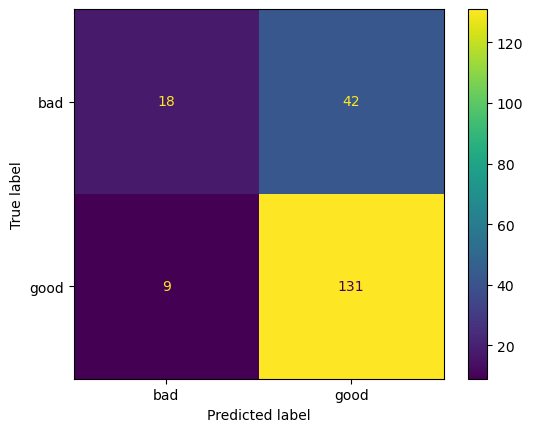

              precision    recall  f1-score   support

         bad       0.67      0.30      0.41        60
        good       0.76      0.94      0.84       140

    accuracy                           0.74       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.73      0.74      0.71       200



In [19]:
metricas_classificacao(pipe_svc)

Agora, podemos montar um gridsearch para otimizar o modelo:

In [21]:
# Uso da função de pipeline para pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_german(df, X, y)

pipe_svc = Pipeline([('pre_process', pre_processador), # Nosso pré-processamento dos dados - criado com a função
                     ('svc', SVC(random_state=42))]) # Instanciando o modelo SVM pra classificação

pipe_svc.fit(X_train, y_train) # Treinando o modelo

# ================================================================================

param_grid_svc = {"svc__kernel" : ['linear', 'rbf', 'poly'],
                  "svc__C" : np.logspace(-2, 2, 5),
                  "svc__gamma": np.logspace(-2, 2, 5)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svc = GridSearchCV(estimator=pipe_svc,
                        param_grid=param_grid_svc,
                        scoring='f1_weighted',
                        cv=cv,
                        verbose=10,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                 

In [22]:
grid_svc.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


Métricas de avaliação de treino:
[[107 133]
 [ 30 530]]


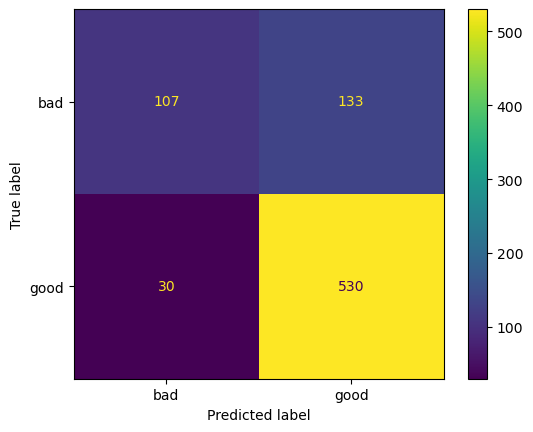

              precision    recall  f1-score   support

         bad       0.78      0.45      0.57       240
        good       0.80      0.95      0.87       560

    accuracy                           0.80       800
   macro avg       0.79      0.70      0.72       800
weighted avg       0.79      0.80      0.78       800


Métricas de avaliação de teste:
[[ 23  37]
 [ 10 130]]


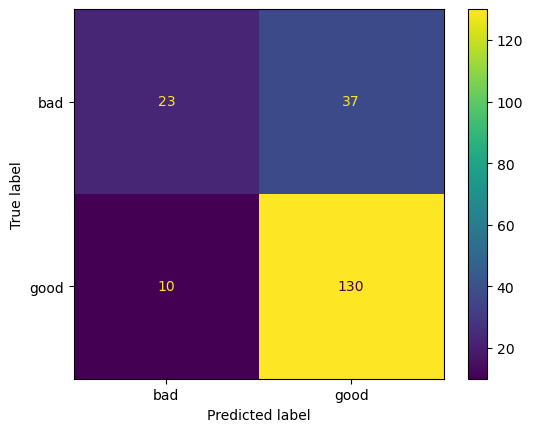

              precision    recall  f1-score   support

         bad       0.70      0.38      0.49        60
        good       0.78      0.93      0.85       140

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.67       200
weighted avg       0.75      0.77      0.74       200



In [23]:
metricas_classificacao(grid_svc)

E esse é o SVM para classificação! :)

O SVM também pode ser utilizado para regressão, vamos ver a seguir, mas antes..

____
____
____

# 6) Bora praticar?
Admission_Predict.csv

Com os dados do arquivo Admission_Predict.csv realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor ou igual a 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado. Agora inclusive o SVC - utilize o kernel.

In [3]:
# Importar as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

df_admision = pd.read_csv('../datasets/Admission_Predict.csv')
df_admision.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df_admision['target'] = np.where(df_admision['Chance of Admit '] > 0.8, 1, 0)
df_admision.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,target
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [9]:
df_admision = df_admision.drop(['Serial No.', 'Chance of Admit '], axis=1)

In [10]:
df_admision.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,target
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [17]:
df_admision['target'].value_counts()

0    283
1    117
Name: target, dtype: int64

In [18]:
df_admision['target'].value_counts(normalize=True)

0    0.7075
1    0.2925
Name: target, dtype: float64

In [12]:
X = df_admision.drop('target', axis=1)
y = df_admision['target']

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [20]:
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       226
           1       0.00      0.00      0.00        94

    accuracy                           0.71       320
   macro avg       0.35      0.50      0.41       320
weighted avg       0.50      0.71      0.58       320



c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        57
           1       0.00      0.00      0.00        23

    accuracy                           0.71        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.51      0.71      0.59        80



c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


____
____
____

## 7) SVM para regressão

Embora fizemos nossa apresentação do SVM como um classificador, também é possível utilizar este método para regressão!

Todos os elementos do classificador SVM (margem, kernel, etc.) também são relevantes aqui.

A ideia é bem simples: utilização de um kernel para que um modelo de **regressão linear seja treinado no espaço de features**. No espaço de inputs, este modelo é refletido como uma regressão não-linear (da mesma forma que, no caso de classificação, fronteiras de decisão lineares no espaço de features são refletidas como fronteiras não-lineares no espaço de input).

A principal diferença é que o conceito de margem também está presente, de modo que **apenas alguns pontos efetivamente vão contriuir para a regressão**. Neste caso, são os pontos **dentro da margem** que serão estes vetores de suporte. Ou seja, pontos que estão fora da margem não contribuem para a função de custo.

<img src=https://www.saedsayad.com/images/SVR_5.png width=600>

Uma comparação entre classificadores e regressores SVM:

<img src=https://miro.medium.com/max/1100/1*XE9jt0r1yAW8LnliQ3mllQ.png width=600>

A classe de regressores SVM no sklearn é a [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Vamos vê-la em ação!

In [24]:
# Vamos usar um dataset que tenho target com valores contínuos para a regressão

# Carregar o dataset
df = pd.read_csv("../datasets/house_prices.csv")

# DEfinir quem são as features e quem é o target
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# particiona os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
# criando a função
def pipe_pre_process_house_prices(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # particiona dados
    
    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  ("onehot", OneHotEncoder())])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [28]:
from sklearn.svm import SVR

In [29]:

df = pd.read_csv("../datasets/house_prices.csv") #carrega os dados

X = df.drop(columns=["SalePrice", "Id"]) # define feature
y = df["SalePrice"] # define target

# usando a primeira função pipe_pre_process_house_prices _> função para organizar os dados e reaproveitar
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_house_prices(df, X, y)

# prepara os dados e instacia o modelo
pipe_svr = Pipeline([('pre_process', pre_processador),
                     ('svc', SVR())]) 

pipe_svr.fit(X_train, y_train) #treinando o modelo

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLi...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('svc', SVR())])

In [30]:
# são as métricas que usamos quando tem regressão!!!!
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
# função para avaliar o modelo
def metricas_regressao(estimator):
    
    # predições de treino
    y_pred_train = estimator.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}") # medida de r2
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}") # medida do erro médio absoluto
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}") #medida do erro médio quadrático

    # predições de teste
    y_pred_test = estimator.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

In [32]:
metricas_regressao(pipe_svr)


Métricas de treino:

R^2: -0.04
MAE: 54502.05
RMSE: 78921.69


ValueError: Found unknown categories ['Membran'] in column 14 during transform

In [40]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [35]:
for col in X_test.select_dtypes(exclude=np.number).columns:
    if 'Membran' in X_test[col].unique().tolist():
        print(col)

RoofMatl


In [41]:
df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

Corrigindo, então, com o `handle_unknown`:

Temos um alto underfitting!!!

Pra testar se a culpa é do estimador ou dos dados:

____
____
____

## Mini tarefa

Usando o dataset de infarto (heart.csv), obtenha a acurácia nos dados de teste de um modelo de SVM, com parâmetro de regularização igual a 10, gamma como 'scale' e kernel do tipo 'rbf'. Utilize todas as variáveis presentes no dataset e divida em treino e teste, sendo 20% para teste, com random state igual a 42. Envie o valor encontrado no [forms](https://forms.gle/vv9F4u7LqnoVRg9Y6)

Sobre o dataset:  

- **Age** Idade do paciente  
- **Sex** Gênero do paciente  
- **exang** exercise induced angina (1 = yes; 0 = no)  
- **ca** number of major vessels (0-3)  
- **cp** Chest Pain type chest pain type  
Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic  
- **trtbps** Pressão arterial em repouso (in mm Hg)  
- **chol** Colesterol  
- **fbs** glicemia > 120 mg/dl (1 = true; 0 = false)  
- **rest_ecg** resultados do eletrocardiograma em repouso  
Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- **thalach** Máximo valor de batimentos registrados  
  
- **target** 0= Chances menores de infarto 1= Maiores chances de infarto